# Numerical Solutions for Nonlinear Systems
The method used to model the system is the phase plane method. The trajectory of a system, given its previous state can be found numerically using this method.

In this document, the nonlinear system modelled is a pendulum.

## Import Libraries & Initialise Variables

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
g = 9.81
l = 2

theta = np.linspace(-10, 10, 20)
theta_dot = np.linspace(-10, 10, 20)

## Define States and Functions

The equation governing the motion of a pendulum is the following:

$\ddot{\theta} + \frac{g}{l}sin{\theta}=0$

We define a state as:

$
\boldsymbol{\theta} =  
\begin{bmatrix}
\theta \\
\dot{\theta}
\end{bmatrix} = 
\begin{bmatrix}
\theta_1 \\
\theta_2 
\end{bmatrix}
$

Create a state-space equation:

$
\boldsymbol{\dot{\theta}} =
\begin{bmatrix}
\dot{\theta} \\
\ddot{\theta} 
\end{bmatrix} = 
\begin{bmatrix}
\theta_2 \\
-\frac{g}{l}sin{\theta_1}
\end{bmatrix}
$

The n<sup>th</sup> state, given the previous n-1<sup>th</sup> state, is given by:

$
\boldsymbol{\theta_n} =  
\begin{bmatrix}
\theta_{1,n} \\
\theta_{2,n}
\end{bmatrix} + 
\delta t \begin{bmatrix}
\theta_{2,n-1} \\
-\frac{g}{l}sin{\theta_{1,n-1}}
\end{bmatrix}
$, where $\delta t$ is a small increment in time.

In [3]:
def calc_new_state(prev_state, delta_t=0.01):

    state_dt = np.array([prev_state[1], -(g/l)*np.sin(prev_state[0])])
    new_state = prev_state + delta_t * state_dt
    
    return new_state

In [4]:
def calculate_path(init_state, time=5, plot=True, color='#FFFFFF'):
    state_array = np.array([init_state])

    old_state = np.array(init_state)
    for i in range(0, time*100):
        new_state = calc_new_state(old_state)
        state_array = np.append(state_array, [new_state], axis=0)
        old_state = new_state

    state_array = state_array.T

    if plot:
        plt.plot(state_array[0], state_array[1], color=color)
        plt.scatter(init_state[0], init_state[1], 15, marker='.', color=color)
        plt.scatter(state_array.T[-1][0], state_array.T[-1][1], 15, marker='x', color=color)
        return state_array
    else:
        return state_array

## Plot
Plot vector field and trajectory for given inital conditions.

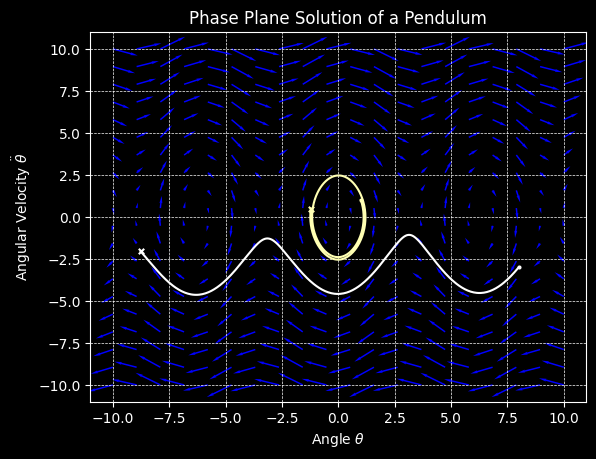

In [15]:
plt.style.use('dark_background')
fig, ax = plt.subplots()

calculate_path([8,-3], time=6)
calculate_path([1, 1], color='#ffffb3')

for i in theta:
    for j in theta_dot:
        # Starting point (x, y) and vector components (dx, dy)
        state_direction = calc_new_state([i, j]) - np.array([i,j])
        ax.quiver(i, j, state_direction[0], state_direction[1], color='blue', width=0.003, scale=2, headwidth=2)

plt.grid(True, linestyle='--', linewidth=0.5)
plt.title("Phase Plane Solution of a Pendulum")
plt.xlabel("Angle $\\theta$")
plt.ylabel("Angular Velocity $\\ddot{\\theta}$")
plt.show()

A dot indicates where the trajectory starts and an x indicates where it ends.